# Scikit Learn ANN for Predicting Continuous Well Measurements

## Importing Libraries and Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

med_tutorial_scikit_learn_1.py

In [2]:
df = pd.read_csv('Data/Volve/volve_wells.csv', usecols=['WELL', 'DEPTH', 'RHOB', 'GR', 'NPHI', 'PEF', 'DT'])

In [3]:
df = df.dropna()

## Create Training, Testing and Validation Datasets

Our dataset should have 4 wells within it. We can confirm this by calling upon the `unique()` function

In [4]:
df

,DEPTH,DT,GR,NPHI,PEF,RHOB,WELL
69703,2577.0,109.3850,74.6970,0.4030,8.1360,2.3470,15/9-F-11 A
69704,2577.1,110.1320,72.7970,0.3990,7.9250,2.3570,15/9-F-11 A
69705,2577.2,110.8430,71.6290,0.3900,7.7750,2.3600,15/9-F-11 A
69706,2577.3,111.0100,69.8990,0.3850,7.5920,2.3610,15/9-F-11 A
69707,2577.4,110.7970,69.0410,0.3820,7.3800,2.3630,15/9-F-11 A
...,...,...,...,...,...,...,...
149702,3641.7,74.4395,120.4854,0.1973,7.0911,2.6337,15/9-F-1 A
149703,3641.8,74.5584,120.2856,0.1930,7.0064,2.6295,15/9-F-1 A
149704,3641.9,74.6748,119.9561,0.1879,6.8993,2.6240,15/9-F-1 A
149705,3642.0,74.7656,122.5272,0.1825,6.8016,2.6194,15/9-F-1 A


As we are using measurements taken from multiple wells, one way to split our data into training and testing is to set aside a single well (blind test well) which will be used to see how our model performs on unseen data.

In [5]:
# Training Wells
training_wells = ['15/9-F-11 A', '15/9-F-1 A']

# Test Well
test_well = ['15/9-F-1 B']

"Extract" the data from the main dataframe using the well lists above

In [6]:
train_val_df = df[df['WELL'].isin(training_wells)].copy()
test_df = df[df['WELL'].isin(test_well)].copy()

In [7]:
train_val_df.describe()

,DEPTH,DT,GR,NPHI,PEF,RHOB
count,21688.000000,21688.000000,21688.000000,21688.000000,21688.000000,21688.000000
mean,3141.098875,77.235857,39.803246,0.166648,7.093603,2.475232
std,314.723749,14.336048,57.907158,0.099200,1.188313,0.147635
min,2577.000000,53.165000,0.852000,0.010000,4.297800,1.980600
25%,2869.475000,66.849300,9.416350,0.096000,6.218475,2.379000
50%,3140.550000,72.720750,27.552000,0.136000,7.487700,2.533000
75%,3411.625000,86.093800,44.877425,0.217200,8.001000,2.581400
max,3723.300000,126.827000,1124.403000,0.593200,13.841000,3.025000


In [8]:
test_df.describe()

,DEPTH,DT,GR,NPHI,PEF,RHOB
count,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000
mean,3261.550000,84.236378,72.114743,0.204948,6.448994,2.452392
std,94.180262,14.488623,61.620077,0.097875,0.830665,0.133218
min,3098.500000,58.631800,8.001500,0.059500,4.729900,2.111800
25%,3180.025000,74.450700,38.552300,0.146300,5.917400,2.364200
50%,3261.550000,81.407800,50.796200,0.172400,6.345200,2.483300
75%,3343.075000,88.037350,64.980325,0.225450,6.910000,2.539875
max,3424.600000,125.982700,297.767300,0.557600,10.987600,3.051700


## Proprocessing

## Implementing the Random Forest Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

### Selecting Training and Target Features

In [10]:
X = train_val_df[['RHOB', 'GR', 'NPHI', 'PEF']]
y = train_val_df['DT']

Note that the name test used here is commonly used within machine learning. In this case the variables X_test and y_test are our validation data. In other words it is used to help tune our model. 

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

Checking the shapes of X_train and X_test to make sure they have been split correctly.

### Applying Standard Scaler

In [12]:
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_train

array([[-0.45500068,  0.12198551,  0.03143028, -1.33766317],
       [-0.04217912, -0.55153053, -0.21079483,  0.80663505],
       [-1.46125324, -0.36535724,  0.03143028, -1.6310438 ],
       ...,
       [-1.82790398, -0.21927636,  0.68745661, -1.81045831],
       [-1.98407003, -0.09303234,  0.88527378, -1.83058979],
       [ 0.28848552, -0.28963525, -0.44292722,  0.49177522]])

In [15]:
X_val = scaler.transform(X_val)

In [16]:
X_val

array([[ 0.85407822, -0.60667942, -1.00811914,  1.09555138],
       [ 1.26825775, -0.64234039, -1.4521985 ,  1.33814001],
       [-1.66494809, -0.23387922,  0.74801289, -1.84246653],
       ...,
       [ 0.83031383, -0.42153199, -1.0131655 ,  0.53321745],
       [-1.14892114,  2.80566018,  2.60507204,  0.35936226],
       [ 0.2973123 , -0.53602045, -0.4227418 ,  1.07533566]])

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

### Building the Model

In [17]:
model = MLPRegressor(hidden_layer_sizes=(64, 64,64), 
                     activation="relu" ,
                     random_state=42, max_iter=2000)

In [18]:
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(64, 64, 64), max_iter=2000, random_state=42)

In [19]:
y_pred = model.predict(X_val)

### Check the Prediction Results

In [20]:
mae = metrics.mean_absolute_error(y_val, y_pred)

In [21]:
mse = metrics.mean_squared_error(y_val, y_pred)
rmse = mse**0.5 

In [22]:
rmse

3.369147001404765

In [23]:
r2 = metrics.r2_score(y_val, y_pred)
r2

0.9455581622005285

In [24]:
print(f"""
MAE: \t{mae:.2f}
RMSE: \t{rmse:.2f}
r2: \t{r2:.2f}
""")


MAE: 	2.16
RMSE: 	3.37
r2: 	0.95



Simple metrics like above are a nice way to see how a model has performed, but you should always check the actual data. 

In the plot below, we are comparing the real data against the predicted data.

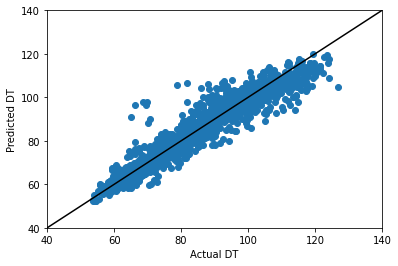

In [25]:
plt.scatter(y_val, y_pred)
plt.xlim(40, 140)
plt.ylim(40, 140)
plt.ylabel('Predicted DT')
plt.xlabel('Actual DT')
plt.plot([40,140], [40,140], 'black') #1 to 1 line
plt.show()

## Test Well Prediction
Once the model has been fine tuned, we can apply it to our blind test well and see how it performs.

In [26]:
test_well_x = test_df[['RHOB', 'GR', 'NPHI', 'PEF']]

In [27]:
test_well_x = scaler.transform(test_well_x)

In [28]:
test_df['TEST_DT'] = model.predict(test_well_x)

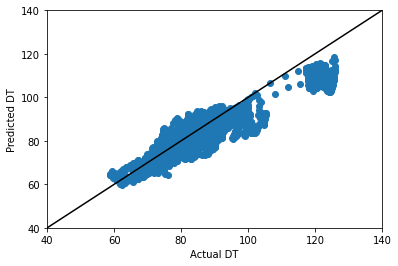

In [31]:
plt.scatter(test_df['DT'], test_df['TEST_DT'])
plt.xlim(40, 140)
plt.ylim(40, 140)
plt.ylabel('Predicted DT')
plt.xlabel('Actual DT')
plt.plot([40,140], [40,140], 'black') #1 to 1 line
plt.show()

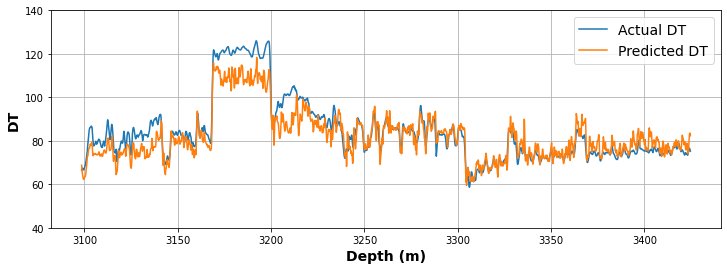

In [39]:
plt.figure(figsize=(12, 4))
plt.plot(test_df['DEPTH'], test_df['DT'], label='Actual DT')
plt.plot(test_df['DEPTH'], test_df['TEST_DT'], label='Predicted DT')

plt.xlabel('Depth (m)', fontsize=14, fontweight='bold')
plt.ylabel('DT', fontsize=14,fontweight='bold')

plt.ylim(40, 140)
plt.legend(fontsize=14)
plt.grid()